In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import DataLoader   #包装可迭代的数据
import torch.utils.data as Data 

from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  ###计算roc和auc

In [2]:
label=np.genfromtxt('yellowModule_interaction_Image_data_label_1_1.csv',delimiter=',')
label=label.reshape((12098 ,1))   #设置格式
print(label.shape)
label=torch.from_numpy(label)   #将numpy转为tensor
label=label.to(torch.float32)

(12098, 1)


In [3]:
label[0].shape

torch.Size([1])

In [4]:
interaction_image=np.genfromtxt('yellowModule_interaction_Image_data_1_1.csv',delimiter=',')
interaction_image=interaction_image.reshape((12098,1,32,32))
print(interaction_image.shape)
interaction_image=torch.from_numpy(interaction_image)
interaction_image=interaction_image.to(torch.float32)
print(type(interaction_image))

(12098, 1, 32, 32)
<class 'torch.Tensor'>


In [5]:
#将图像和标签拼接为一个数据集，以便进行批处理
datasets=Data.TensorDataset(interaction_image,label)

In [6]:
datasets.tensors

(tensor([[[[ 7.,  6.,  5.,  ...,  0.,  0.,  0.],
           [ 0.,  1.,  3.,  ...,  0.,  0.,  0.],
           [ 0.,  0.,  2.,  ...,  0.,  0.,  0.],
           ...,
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]],
 
 
         [[[ 2.,  2.,  1.,  ...,  0.,  0.,  0.],
           [ 1.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 1.,  1.,  0.,  ...,  0.,  0.,  0.],
           ...,
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]],
 
 
         [[[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           ...,
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]],
 
 
         ...,
 
 
         [[[10.,  4.,  1.,  ...,  

In [7]:
datasets.tensors[0][0].sum()

tensor(1173.)

In [8]:
datasets.tensors[0][23][0]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [9]:
#划分训练集测试集   这里暂时使用8:2的划分，后续进行修改
train_size=round(1*interaction_image.shape[0])
test_size=interaction_image.shape[0]-train_size
#test_size=round(0.1*interaction_image.shape[0])
#valid_size=interaction_image.shape[0]-train_size-test_size
#print(train_size,test_size,valid_size)
print(train_size,test_size)
train_dataset,test_dataset=Data.random_split(datasets,[train_size,test_size])
#train_dataset,test_dataset,valid_dataset=Data.random_split(datasets,[train_size,test_size,valid_size])


12098 0


In [10]:
for i in train_dataset:
    print(i)

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[6., 3., 5.,  ..., 0., 0., 0.],
         [0., 1., 9.,  ..., 0., 0., 0.],
         [0., 1., 3.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[20.,  2.,  0.,  ...,  0.,  0.,  0.],
         [14., 20.,  1.,  ...,  0.,  0.,  0.],
         [ 2., 26.,  8.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 2.,  ..., 0., 0., 0.],
         [6., 1., 1.,  ..., 0., 0., 0.],
      

(tensor([[[10.,  3.,  0.,  ...,  0.,  0.,  0.],
         [ 3., 11.,  8.,  ...,  0.,  0.,  0.],
         [ 1.,  7., 14.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[13.,  9.,  2.,  ...,  0.,  0.,  0.],
         [ 1., 20.,  4.,  ...,  0.,  0.,  0.],
         [ 1.,  3., 14.,  ...,  0.,

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 0.,  ..., 0., 0., 0.],
         [1., 0., 2.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 2.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[16.,  6.,  0.,  ...,  0.,  0.,  0.],
         [12., 17.,  5.,  ...,  0.,  0.,  0.],
         [ 6., 17.,  8.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[2., 4., 7.,  ..., 0., 0., 0.],
         [1., 1., 4.,  ..., 0., 0., 0.],
         [0., 1., 8.,  ..., 0., 0., 0.],
      

(tensor([[[5., 2., 1.,  ..., 0., 0., 0.],
         [1., 3., 5.,  ..., 0., 0., 0.],
         [0., 2., 4.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]]]), tensor([1.]))
(tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[ 2.,  9.,  4.,  ...,  0.,  0.,  0.],
         [ 0.,  6., 12.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  7.,  ...,  0.,  0.,  0.],
         ...,
         [

(tensor([[[6., 6., 3.,  ..., 0., 0., 0.],
         [1., 2., 6.,  ..., 0., 0., 0.],
         [0., 1., 8.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[3., 1., 4.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[1., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 4., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 3., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[18., 14.,  5.,  ...,  0.,  0.,  0.],
         [ 5., 17., 14.,  ...,  0.,  0.,  0.],
         [ 0.,  5., 11.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[ 2.,  3.,  8.,  ...,  0.,  0.,  0.],
         [ 1.,  7., 11.,  ...,  0.,  0.,  0.],
         [ 0.,  4.,  5.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0

(tensor([[[11., 10.,  3.,  ...,  0.,  0.,  0.],
         [ 2., 10., 11.,  ...,  0.,  0.,  0.],
         [ 1.,  1.,  9.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  1.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 2.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [1., 1., 0.,  ..., 0., 0., 0.],
      

(tensor([[[ 6., 11.,  1.,  ...,  0.,  0.,  0.],
         [ 1.,  8., 12.,  ...,  0.,  0.,  0.],
         [ 0.,  1., 10.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [2., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
      

(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[4., 2., 0.,  ..., 0., 0., 0.],
         [2., 5., 2.,  ..., 0., 0., 0.],
         [0., 5., 7.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[ 7., 11.,  2.,  ...,  0.,  0.,  0.],
         [ 5., 13., 11.,  ...,  0.,  0.,  0.],
         [ 0.,  3., 14.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  1.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  1.,  1.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  1.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 2., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 8., 4.,  ..., 0., 0., 0.],
         [0., 4., 7.,  ..., 0., 0., 0.],
         [1., 3., 8.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
      

(tensor([[[ 6.,  3.,  2.,  ...,  0.,  0.,  0.],
         [12., 14.,  8.,  ...,  0.,  0.,  0.],
         [ 9., 16., 15.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([0.]))
(tensor([[[1., 5., 1.,  ..., 0., 0., 0.],
         [1., 2., 1.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
      

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[1., 3., 0.,  ..., 0., 0., 0.],
         [0., 3., 2.,  ..., 0., 0., 0.],
         [0., 0., 4.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[1., 0., 3.,  ..., 0., 0., 0.],
         [1., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[4., 0., 1.,  ..., 0., 0., 0.],
         [6., 2., 2.,  ..., 0., 0., 0.],
         [3., 3., 2.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[5., 5., 3.,  ..., 0., 0., 0.],
         [0., 3., 4.,  ..., 0., 0., 0.],
         [0., 0., 3.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[5., 2., 7.,  ..., 0., 0., 0.],
         [1., 3., 8.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 2.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[ 9.,  5.,  5.,  ...,  0.,  0.,  0.],
         [ 5., 11., 10.,  ...,  0.,  0.,  0.],
         [ 1.,  9., 11.,  ...,  0.,  0.,  0.],
         ...,
         [

(tensor([[[0., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 2.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[2., 2., 0.,  ..., 0., 0., 0.],
         [2., 4., 3.,  ..., 0., 0., 0.],
         [0., 1., 2.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[ 1., 15., 22.,  ...,  0.,  0.,  0.],
         [ 1.,  0.,  2.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[11.,  0.,  0.,  ...,  0.,  0.,  0.],
         [14.,  9.,  0.,  ...,  0.,  0.,  0.],
         [ 6., 18.,  5.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[11., 11., 18.,  ...,  0.,  0.,  0.],
         [ 0.,  3., 20.,  ...,  0.,  0.,  0.],
         [ 0.,  1.,  2.,  ...,  0.,  0.,  0.],
         ...,
         [

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 3., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[2., 6., 2.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.]]]), tensor([1.]))
(tensor([[[1., 0., 1.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[16.,  0.,  0.,  ...,  0.,  0.,  0.],
         [10., 12.,  2.,  ...,  0.,  0.,  0.],
         [ 3., 17.,  6.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[1., 2., 0.,  ..., 0., 0., 0.],
         [2., 1., 0.,  ..., 0., 0., 0.],
         [4., 3., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[4., 0., 0.,  ..., 0., 0., 0.],
         [3., 0., 0.,  ..., 0., 0., 0.],
         [7., 8., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[ 9.,  6.,  5.,  ...,  0.,  0.,  0.],
         [ 4., 15.,  9.,  ...,  0.,  0.,  0.],
         [ 2., 15., 17.,  ...,  0.,

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 2.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[7., 0., 0.,  ..., 0., 0., 0.],
         [5., 0., 2.,  ..., 0., 0., 0.],
         [0., 3., 5.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.]]]), tensor([1.]))
(tensor([[[2., 5., 0.,  ..., 0., 0., 0.],
         [0., 1., 3.,  ..., 0., 0., 0.],
         [0., 2., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[3., 4., 4.,  ..., 0., 0., 0.],
         [0., 1., 3.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 1., 2.],
         [0., 0., 0.,  ..., 1., 1., 0.],
         [0., 1., 0.,  ..., 2., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[ 8., 25., 22.,  ...,  0.,  0.,  0.],
         [ 7., 38., 48.,  ...,  0.,  0.,  0.],
         [ 4., 10., 27.,  ...,  0.,  0.,  1.],
         ...,
         [

(tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[23., 28.,  8.,  ...,  0.,  0.,  0.],
         [ 0., 19., 20.,  ...,  0.,  0.,  0.],
         [ 0.,  0., 10.,  ...,  0.,  0.,  1.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
      

(tensor([[[1., 3., 0.,  ..., 0., 0., 0.],
         [2., 2., 2.,  ..., 0., 0., 0.],
         [2., 7., 4.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[3., 3., 8.,  ..., 0., 0., 0.],
         [3., 4., 5.,  ..., 0., 0., 0.],
         [1., 2., 3.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[ 9.,  5.,  2.,  ...,  0.,  0.,  0.],
         [ 7., 21., 16.,  ...,  0.,  0.,  0.],
         [ 1.,  8., 12.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
      

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[ 7.,  5.,  3.,  ...,  0.,  0.,  0.],
         [ 0.,  5., 12.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  3.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
      

(tensor([[[0., 2., 4.,  ..., 0., 0., 0.],
         [1., 1., 5.,  ..., 0., 0., 0.],
         [0., 1., 2.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]]]), tensor([0.]))
(tensor([[[1., 1., 1.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [1., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.],
         [1., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[3., 0., 0.,  ..., 0., 0., 0.],
         [2., 0., 0.,  ..., 0., 0., 0.],
         [2., 1., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[ 7.,  3.,  0.,  ...,  0.,  0.,  0.],
         [ 6.,  9., 13.,  ...,  0.,  0.,  0.],
         [ 6., 13., 16.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[4., 3., 1.,  ..., 0., 0., 0.],
         [1., 8., 4.,  ..., 0., 0., 0.],
         [0., 4., 3.,  ..., 0., 0., 0.],
      

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[ 3.,  4.,  3.,  ...,  0.,  0.,  0.],
         [ 2.,  4.,  3.,  ...,  0.,  0.,  0.],
         [ 4.,  7., 12.,  ...,  0.,  0.,  0.],
         ...,
         [

(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [3., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [2., 1., 0.,  ..., 0., 0., 0.],
         [2., 2., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[ 0.,  7.,  5.,  ...,  0.,  0.,  0.],
         [ 1.,  2., 11.,  ...,  0.,  0.,  0.],
         [ 0.,  5.,  3.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  1.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
      

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[ 7.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 2.,  9.,  1.,  ...,  0.,  0.,  0.],
         [ 2., 11.,  2.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  1.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[1., 3., 2.,  ..., 0., 0., 0.],
         [2., 3., 5.,  ..., 0., 0., 1.],
         [3., 5., 5.,  ..., 0., 0., 0.],
      

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[ 8.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 9.,  6.,  0.,  ...,  0.,  0.,  0.],
         [ 2., 11.,  1.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [2., 1., 0.,  ..., 0., 0., 0.],
      

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [4., 0., 2.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.]]]), tensor([1.]))
(tensor([[[14., 16., 11.,  ...,  0.,  0.,  0.],
         [ 0.,  6., 19.,  ...,  0.,  0.,  0.],
         [ 0.,  1.,  6.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[4., 2., 0.,  ..., 0., 0., 0.],
         [3., 5., 7.,  ..., 0., 0., 0.],
         [0., 1., 9.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
      

(tensor([[[14., 28., 13.,  ...,  0.,  0.,  0.],
         [ 1., 10., 30.,  ...,  0.,  0.,  0.],
         [ 0.,  0., 11.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [1., 3., 1.,  ..., 0., 0., 0.],
         [1., 4., 2.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[ 5.,  8.,  0.,  ...,  0.,  0.,  0.],
         [ 7.,  4.,  3.,  ...,  0.,  0.,  0.],
         [ 6., 11., 15.,  ...,  0.,

(tensor([[[11.,  4.,  2.,  ...,  0.,  0.,  0.],
         [ 0.,  7., 22.,  ...,  0.,  0.,  0.],
         [ 0.,  2., 11.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[13., 22., 12.,  ...,  0.,  0.,  0.],
         [16., 29., 31.,  ...,  0.,  0.,  0.],
         [ 6., 11., 25.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 4., 7.,  ..., 0., 0., 0.],
         [0., 0., 2.,  ..., 0., 0., 0.],
         [0

(tensor([[[5., 0., 0.,  ..., 0., 0., 0.],
         [2., 3., 1.,  ..., 0., 0., 0.],
         [4., 4., 3.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[12.,  2.,  1.,  ...,  0.,  0.,  0.],
         [ 0., 13., 19.,  ...,  0.,  0.,  0.],
         [ 1.,  0.,  7.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  1.,  1.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  2.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
      

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[5., 3., 2.,  ..., 0., 0., 0.],
         [2., 6., 1.,  ..., 0., 0., 0.],
         [3., 3., 7.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[0., 0., 2.,  ..., 0., 0., 0.],
         [2., 0., 1.,  ..., 0., 0., 0.],
         [1., 2., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [1., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 1.],
         [0., 0., 2.,  ..., 0., 0., 0.],
         [0., 0., 2.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[ 2.,  1.,  0.,  ...,  0.,  0.,  0.],
         [ 7.,  2.,  0.,  ...,  0.,  0.,  0.],
         [ 1., 10.,  5.,  ...,  0.,  0.,  0.],
         ...,
         [

(tensor([[[ 4.,  5.,  2.,  ...,  0.,  0.,  0.],
         [ 3.,  9.,  9.,  ...,  0.,  0.,  0.],
         [ 3., 23., 24.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([0.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[7., 0., 0.,  ..., 0., 0., 0.],
         [4., 0., 0.,  ..., 0., 0., 0.],
         [4., 2., 4.,  ..., 0., 0., 0.],
      

(tensor([[[ 7.,  1.,  0.,  ...,  0.,  0.,  0.],
         [ 6.,  7.,  5.,  ...,  0.,  0.,  0.],
         [ 1., 14., 16.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 1., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[4., 4., 2.,  ..., 0., 0., 0.],
         [2., 2., 8.,  ..., 0., 0., 0.],
         [0., 0., 3.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
      

(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[13.,  7.,  3.,  ...,  0.,  0.,  0.],
         [ 1., 11., 18.,  ...,  0.,  0.,  0.],
         [ 1.,  9., 15.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[ 5.,  2.,  0.,  ...,  0.,  0.,  0.],
         [10.,  8.,  2.,  ...,  0.,  0.,  0.],
         [ 1.,  7.,  7.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0

(tensor([[[ 5.,  0.,  6.,  ...,  0.,  0.,  0.],
         [ 6.,  1.,  2.,  ...,  0.,  0.,  0.],
         [ 2., 12.,  8.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [2., 0., 0.,  ..., 0., 0., 0.],
         [8., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.],
      

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 4.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 0.,  ..., 0., 0., 0.],
         [8., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [1., 1., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[4., 7., 1.,  ..., 0., 0., 0.],
         [3., 6., 3.,  ..., 0., 0., 0.],
         [0., 5., 8.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[6., 2., 0.,  ..., 0., 0., 0.],
         [6., 1., 0.,  ..., 0., 0., 0.],
         [7., 7., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 1., 1., 1.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[ 8.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 7.,  0.,  0.,  ...,  0.,  0.,  0.],
         [13.,  2.,  0.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[ 4.,  3.,  3.,  ...,  0.,  0.,  0.],
         [ 3.,  6., 13.,  ...,  0.,  0.,  0.],
         [ 0.,  1.,  2.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[ 2.,  1.,  2.,  ...,  0.,  0.,  0.],
         [ 8.,  7.,  2.,  ...,  0.,  0.,  0.],

(tensor([[[1., 2., 5.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]]]), tensor([1.]))
(tensor([[[ 5.,  5.,  2.,  ...,  0.,  0.,  0.],
         [10., 13.,  6.,  ...,  0.,  0.,  0.],
         [11., 17., 10.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[3., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 0.,  ..., 0., 0., 0.],
      

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[3., 1., 0.,  ..., 0., 0., 0.],
         [8., 1., 1.,  ..., 0., 0., 0.],
         [3., 7., 4.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         ...,
         [0., 1., 2.,  ..., 

(tensor([[[4., 2., 1.,  ..., 0., 0., 0.],
         [2., 4., 5.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 3., 1.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[14.,  5.,  3.,  ...,  0.,  0.,  0.],
         [ 3., 27., 13.,  ...,  0.,  0.,  0.],
         [ 0.,  2., 13.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  1.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [1., 2., 1.,  ..., 0., 0., 0.],
         [1., 2., 3.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
      

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [1., 1., 0.,  ..., 1., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

In [11]:
#将数据集作为参数传递给DataLoader。这在我们的数据集上包裹了一个可迭代的数据集，并支持自
#动批处理、采样、洗牌和多进程数据加载。在这里，我们定义了一个64的批处理大小，即dataloader可
#迭代的每个元素将返回一个批次，包括64个元素的特征和标签。
batch_size=64
#创建数据加载器，也就是迭代器，分批次
train_dataloader=DataLoader(train_dataset,batch_size=batch_size)
test_dataloader=DataLoader(test_dataset,batch_size=batch_size)
#valid_dataloader=DataLoader(valid_dataset,batch_size=batch_size)


#用所有的数据进行训练试一下
#train_dataloader2=DataLoader(datasets,batch_size=batch_size)

In [12]:
for X,y in test_dataloader:
    print(X)
    print("X[N,C,H,W]的形状：",X.shape)
    print("y的形状:", y.shape,y.dtype)
    break;    #查看一个批次


In [13]:
#用pytorch构建神经网络
#为了在PyTorch中定义一个神经网络，我们创建一个继承自nn.Module的类。我们在init函数中定义网络
#的层，并在forward函数中指定数据将如何通过网络。为了加速神经网络的操作，如果有GPU的话，我
#们把它移到GPU上

device="cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

class CnncNet(nn.Module):
    def __init__(self):
        super(CnncNet,self).__init__()
        #self.flatten=nn.Flatten()
        self.conv=nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3,padding=1),    # 输入(1,1,32,32)     输出 (1,32,32,32)  第一个1代表批量大小
            nn.ReLU(),   
            nn.Conv2d(in_channels=32,out_channels=32,kernel_size=(3,3)),     #输入(1,32,32,32)  输出(1,32,30,30)
            nn.ReLU(),
            nn.MaxPool2d(2,2),         #输出 (1,32,15,15)
            nn.Dropout2d(0.25),        ## 表示每个神经元有0.25的可能性不被激活  Dropout只能用在训练部分而不能用在测试部分
    
            nn.Conv2d(in_channels=32,out_channels=64,kernel_size=(3,3),padding=(1,1)),     #输入(1,32,15,15)  #输出(1,64,15,15)
            nn.ReLU(),
            nn.Conv2d(in_channels=64,out_channels=64,kernel_size=(3,3)),      #输入(1,64,15,15)   输出(1,64,13,13)
            nn.ReLU(),
            nn.MaxPool2d(2,2),     #输入(1,64,13,13)   输出(1,64,6,6)
            nn.Dropout2d(0.25),
    
            nn.Conv2d(in_channels=64,out_channels=128,kernel_size=(3,3),padding=(1,1)),   #输入(1,64,6,6)   输出(1,128,6,6)
            nn.ReLU(),
            nn.Conv2d(in_channels=128,out_channels=128,kernel_size=(3,3)),   #输入(1,128,6,6)   输出(1,128,4,4)
            nn.ReLU(),
            nn.MaxPool2d(2,2),        #输入(1,128,4,4)   输出(1,128,2,2)
            nn.Dropout2d(0.25),
            nn.Flatten(),      #结果为 (1,512)
            #后续添加的层
            nn.Linear(in_features=512,out_features=512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(in_features=512,out_features=1),    #out_feaures=1是将二分类输出为一个神经元，若是必须得2个，后续在修改，标签也要修改
            nn.Sigmoid()   
            
        )
        #self.FC1=nn.Linear(512,512)
        #self.FC2=nn.Linear(512,1)
        #self.Sg=nn.Sigmoid()
        #self.Rl=nn.ReLU()
        #self.dr=nn.Dropout(0.5)
    def forward(self,x):
        logits=self.conv(x)
        #x=logits.reshape(logits.shape[0],-1)
        #x=self.FC1(x)
        #x=self.Rl(x)
        #x=self.dr(x)
        #x=self.FC2(x)
        #logits=self.Sg(x)
        
        return logits

Using cuda device


In [14]:
#创建模型
model=CnncNet().to(device)
print(model)

CnncNet(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout2d(p=0.25, inplace=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Dropout2d(p=0.25, inplace=False)
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (15): ReLU()
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Dropout2d(p=0.25, inplace=False)
    (18): Flatten(start_dim=1, end_dim=-1)
    (19): Linear(in_features=512, out_fe

In [30]:
def show_ROC(label,pred):   #显示ROC曲线
    fpr,tpr,threshold = roc_curve(label, pred) ###计算真正率和假正率
    roc_auc=auc(fpr,tpr)###计算auc的值
    
    plt.figure()
    lw = 2
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.savefig ("ROC.png",dpi=300) 
    plt.show()     

In [16]:
def ROC_test(ROC_data,model): #根据测试集合得到模型输出
    score_list=np.array([])
    label_list=np.array([])
    model.eval()
    with torch.no_grad():
        for X,y in ROC_data:
            X,y=X.to(device),y.to(device)
            #X=torch.nn.functional.normalize(X)
            pred=model(X)
            #pred=torch.round(model(X))
            label=y.cpu().numpy()
            score=pred.cpu().numpy()
            #if score>0.5 and 1-score<0.3:
            #    score=score
            #elif score>0.5 and 1-score>=0.3:
            #    score=score-0.2
            #if score<0.5 and score-0<0.3:
            #    score=score
            #else:
            #    score=score+0.2
            label_list=np.append(label_list,values=label)
            score_list=np.append(score_list,values=score)
    print(label_list)
    print(score_list)
    show_ROC(label_list,score_list)

In [17]:
#绘制多个模型的roc曲线
def pred_label_file(ROC_data,model,K_Model_Name):  #该函数将模型的预测结果和标签保存到csv文件中，最终一起画Roc曲线
    score_list=np.array([])
    label_list=np.array([])
    model.eval()
    with torch.no_grad():
        for X,y in ROC_data:
            X,y=X.to(device),y.to(device)
            pred=model(X)
            label=y.cpu().numpy()
            score=pred.cpu().numpy()
            label_list=np.append(label_list,values=label)
            score_list=np.append(score_list,values=score)
    df=pd.DataFrame({'label':label_list,'pred':score_list})
    s="K_pred/{0}.csv".format(K_Model_Name)
    df.to_csv(s,index=False,sep=',')

In [28]:
#%matplotlib inline
#plt.style.use("ggplot")
#画置信柱状图
def show_bar(ROC_data,model):
    score_list=np.array([])
    label_list=np.array([])
    true_list=[0,0,0,0,0]
    false_list=[0,0,0,0,0]
    model.eval()
    with torch.no_grad():
        for X,y in ROC_data:
            X,y=X.to(device),y.to(device)
            #X=torch.nn.functional.normalize(X)
            pred=model(X)
            #pred=torch.round(model(X))
            label=y.cpu().numpy()
            score=pred.cpu().numpy()
            if score>0 and score<0.2:
                if label==0:
                    true_list[0]=true_list[0]+1
                else:
                    false_list[0]=false_list[0]+1
            elif score>=0.2 and score<0.4:
                if label==0:
                    true_list[1]=true_list[1]+1
                else:
                    false_list[1]=false_list[1]+1
            elif score>=0.4 and score<0.5:
                if label==0:
                    true_list[2]=true_list[2]+1
                else:
                    false_list[2]=false_list[2]+1
            elif score>=0.5 and score<0.6:
                if label==1:
                    true_list[2]=true_list[2]+1
                else:
                    false_list[2]=false_list[2]+1
            elif score>=0.6 and score<0.8:
                if label==1:
                    true_list[3]=true_list[3]+1
                else:
                    false_list[3]=false_list[3]+1
            else :
                if label==1:
                    true_list[4]=true_list[4]+1
                else:
                    false_list[4]=false_list[4]+1
            #if score>0.5 and 1-score<0.3:
            #    score=score
            #elif score>0.5 and 1-score>=0.3:
            #    score=score-0.2
            #if score<0.5 and score-0<0.3:
            #    score=score
            #else:
            #    score=score+0.2
            label_list=np.append(label_list,values=label)
            score_list=np.append(score_list,values=score)
    sum=true_list[0]+true_list[1]+true_list[2]+true_list[3]+true_list[4]
    print(sum)
    regions = ["0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1"]
    true_1 = [true_list[0], true_list[1], true_list[2], true_list[3], true_list[4]]
    false_2 = [false_list[0], false_list[1],false_list[2],false_list[3], false_list[4]]
    
    fig, ax = plt.subplots(figsize=(10, 7))
    # 先创建一根柱子，显示各个区间true
    ax.bar(regions, true_1, color=[0.8,0.1,0.2], label="True_prediction")
    # 第二根柱子“堆积”在第一根柱子上方，通过'bottom'调整，显示false
    ax.bar(regions, false_2, color=[0.1,0.9,0.2], bottom=true_1, label="False_prediction")

    ax.set_title("Model probability stacked bar plot", fontsize=15)
    ax.set_xlabel("Probability interval")
    ax.set_ylabel("Sample numbers")
    ax.legend()
    plt.grid(False)
    plt.savefig ("confidence.png",dpi=300) 
    plt.show()
    

In [19]:
#这里是为了做训练，得到当前模型的输出神经元的个数，以便确定后续的全连接的神经元的个数

x=datasets.tensors[0][0][0].reshape((1,1,32,32))
x= x.to(torch.float32)
print(x.shape)
x=x.to(device)
y=model(x)
y.shape

torch.Size([1, 1, 32, 32])


torch.Size([1, 1])

In [20]:
len(train_dataloader.dataset)

12098

In [21]:
len(train_dataloader),len(test_dataloader)#

(190, 0)

In [22]:
#模型构建后，要优化模型参数

#定义一个损失函数和优化器
#loss_fn=nn.CrossEntropyLoss()     #交叉熵损失函数
loss_fn=nn.BCELoss()     
#optimizer=torch.optim.SGD(model.parameters(),lr=1e-3)   #优化模型参数，学习率是0.001
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)    #更换这个优化器，模型提高精度显著

In [23]:
#在一个单一的训练循环中，模型对训练数据集（分批送入）进行预测，并通过反向传播预测误差来调整模型的参数

def train(dataloader,model,loss_fn,optimizer):
    size=len(dataloader.dataset)     #数据集中的数据总数，例如训练集中size是4782
    model.train()
    for batch,(X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)    #X就是image_data的批次，y就是对应批次的标签
        
        #计算预测误差
        pred=model(X)
        loss=loss_fn(pred,y)
        #反向传播
        optimizer.zero_grad()  #清空过往梯度
        loss.backward()  #反向传播，计算当前梯度
        optimizer.step() #根据梯度更新网络参数
        
        if batch %50==0: #到50的整数倍，就输出当前的损失
            loss,current=loss.item(),batch*len(X)
            print(f"loss:{loss:>7f}  [{current:>5d}/{size:>5d}]")

In [24]:
#还根据测试数据集检查模型的性能，以确保它在学习
def test(dataloader,model,loss_fn):
    size=len(dataloader.dataset)   #数据集中的行数
    num_batches=len(dataloader)    #一共有的批次数,训练集中是150，测试集是38，每一个批次有32个数据及其标签
    model.eval()
    test_loss,correct=0,0
    with torch.no_grad():  #代表张量中的元素不会自动求导，也就不会保存梯度，节省时间和空间
        for X,y in dataloader:
            X,y=X.to(device),y.to(device)
            pred=model(X)
            #print(pred)
            test_loss+=loss_fn(pred,y).item()
            correct+=(torch.abs(pred-y)<0.3).sum().item()
        test_loss/=num_batches
        correct/=size
        print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss:{test_loss:>8f} \n")

In [25]:
###############################交叉验证版本：将训练集分为K-1个训练集，1个验证集，结束后，用测试集画roc##############################3
kf = KFold(n_splits=5, shuffle=True, random_state=0)
epchs=5
i=0
out_loader=DataLoader(dataset=train_dataset, batch_size=32)
for t in range(epchs):
    print(f"Epoch {t+1}\n-------------------")
    for train_index, val_index in kf.split(train_dataset):   #这里是5次循环
        i=i+1
        train_fold = torch.utils.data.dataset.Subset(train_dataset, train_index)   #训练集
        #print(train_fold)
        val_fold = torch.utils.data.dataset.Subset(train_dataset, val_index)      #验证集
        #打包成DataLoader类型 用于 训练
        train_loader = DataLoader(dataset=train_fold, batch_size=32, shuffle=True)
        val_loader = DataLoader(dataset=val_fold, batch_size=32, shuffle=True)
        
        #ROC_loader=DataLoader(dataset=val_fold, batch_size=1)  #对每个测试集整体画ROC曲线
        
        train(train_loader,model,loss_fn,optimizer)
        test(val_loader,model,loss_fn)   #这里仅仅是为了看正确率，判断是否在训练
        #在验证集上画roc
        #在测试集上画roc
        ROC_loader=DataLoader(dataset=val_fold, batch_size=1)  #对每个测试集整体画ROC曲线
        out_loader=ROC_loader
        #ROC_test(ROC_loader,model)
    #ROC_test(ROC_loader,model)
print(i)#记录训练了多少次
print("done!")

Epoch 1
-------------------
loss:0.692937  [    0/ 9678]
loss:0.540343  [ 1600/ 9678]
loss:0.481327  [ 3200/ 9678]
loss:0.503013  [ 4800/ 9678]
loss:0.314588  [ 6400/ 9678]
loss:0.325730  [ 8000/ 9678]
loss:0.435004  [ 9600/ 9678]
Test Error: 
 Accuracy: 57.9%, Avg loss:0.408764 

loss:0.533594  [    0/ 9678]
loss:0.485782  [ 1600/ 9678]
loss:0.313637  [ 3200/ 9678]
loss:0.388958  [ 4800/ 9678]
loss:0.309408  [ 6400/ 9678]
loss:0.375376  [ 8000/ 9678]
loss:0.470214  [ 9600/ 9678]
Test Error: 
 Accuracy: 53.1%, Avg loss:0.418847 

loss:0.608715  [    0/ 9678]
loss:0.423151  [ 1600/ 9678]
loss:0.383088  [ 3200/ 9678]
loss:0.490978  [ 4800/ 9678]
loss:0.150039  [ 6400/ 9678]
loss:0.349107  [ 8000/ 9678]
loss:0.399494  [ 9600/ 9678]
Test Error: 
 Accuracy: 61.1%, Avg loss:0.411437 

loss:0.292838  [    0/ 9679]
loss:0.308760  [ 1600/ 9679]
loss:0.322779  [ 3200/ 9679]
loss:0.494210  [ 4800/ 9679]
loss:0.555968  [ 6400/ 9679]
loss:0.511493  [ 8000/ 9679]
loss:0.353478  [ 9600/ 9679]
Test Er

[0. 0. 0. ... 0. 0. 0.]
[0.06240132 0.1258111  0.04041503 ... 0.03402184 0.04532091 0.00619548]


<Figure size 640x480 with 0 Axes>

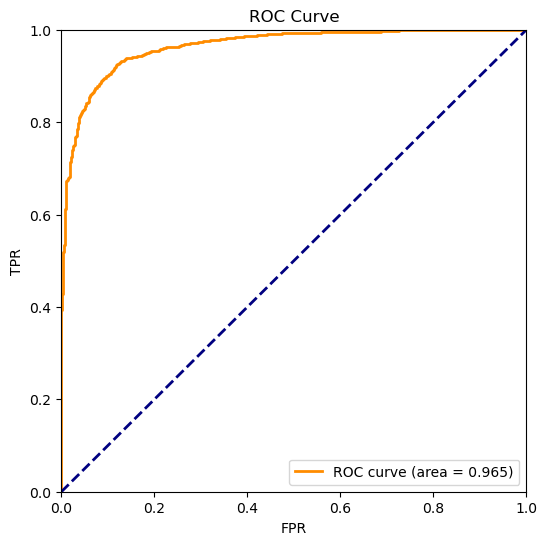

2178


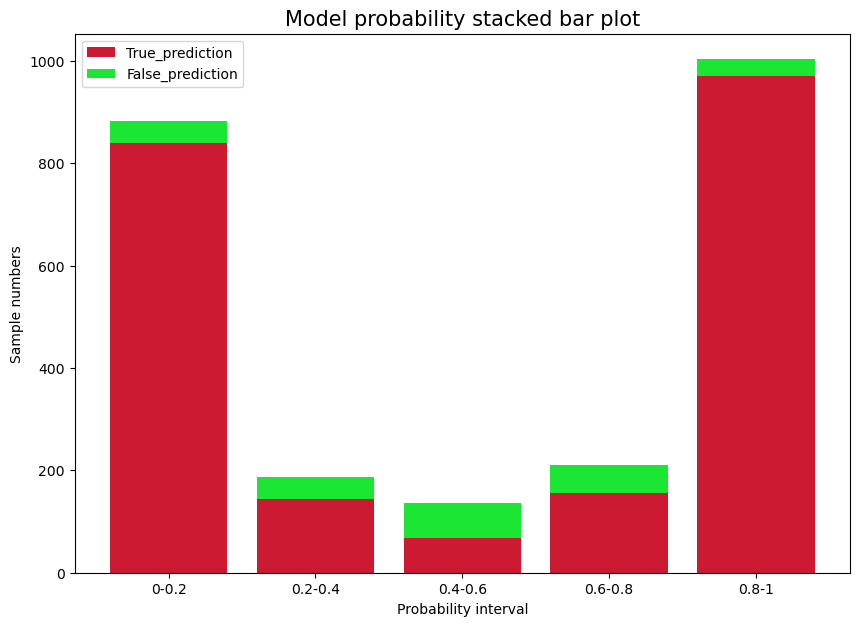

In [31]:
ROC_test(out_loader,model)#画ROC
show_bar(out_loader,model)#画置信图
#pred_label_file(out_loader,model,"7_K_corss")

Test Error: 
 Accuracy: 41.0%, Avg loss:0.983886 

[1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1.


<Figure size 640x480 with 0 Axes>

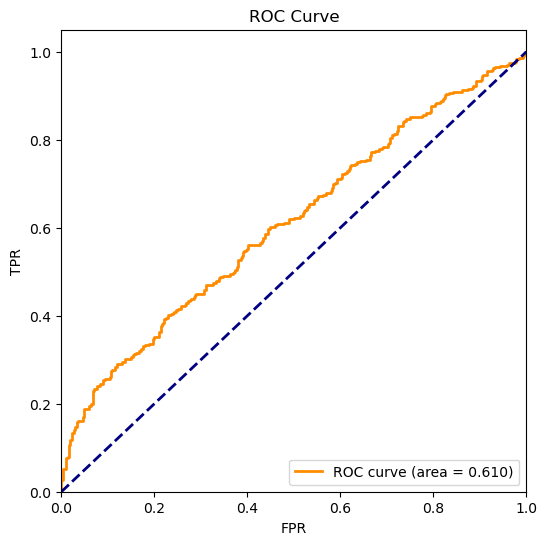

In [33]:
#测试集的精度
test_loader=DataLoader(dataset=test_dataset, batch_size=32)  #对每个测试集整体画ROC曲线
test(test_loader,model,loss_fn) 
#在测试集上画roc
ROC_loader=DataLoader(dataset=test_dataset, batch_size=1)  #对每个测试集整体画ROC曲线
ROC_test(ROC_loader,model)

In [27]:
#保存模型
torch.save(model.state_dict(),"yellowModule_WGCNA_CNN_accuracy_82_roc_0.96.pth")
print("yellowModule_WGCNA_CNN_accuracy_82_roc_0.96.pth")

yellowModule_WGCNA_CNN_accuracy_82_roc_0.96.pth


In [45]:

#################################无交叉验证版本############################################
#训练过程是通过几个迭代（epochs）进行的。在每个epoch中，模型学习参数以做出更好的预测。我们
#在每个epoch中打印模型的准确度和损失；我们希望看到准确度在每个epoch中增加，损失在每个epoch
#中减少。
epchs=50
for t in range(epchs):
    print(f"Epoch {t+1}\n-------------------")
    train(train_dataloader,model,loss_fn,optimizer)  #每一次迭代，都会训练模型
    #train(train_dataloader2,model,loss_fn,optimizer)  #用全部数据做训练，看看效果
    test(test_dataloader,model,loss_fn)  #每一次训练模型，都会使用验证集进行测试，评估当前模型的性能
print("done!")


Epoch 1
-------------------
loss:0.101706  [    0/ 5662]
loss:0.182764  [ 1600/ 5662]
loss:0.036651  [ 3200/ 5662]
loss:0.058806  [ 4800/ 5662]
Test Error: 
 Accuracy: 51.7%, Avg loss:2.514714 

Epoch 2
-------------------
loss:0.064047  [    0/ 5662]
loss:0.075748  [ 1600/ 5662]
loss:0.059942  [ 3200/ 5662]
loss:0.014545  [ 4800/ 5662]
Test Error: 
 Accuracy: 48.1%, Avg loss:2.306240 

Epoch 3
-------------------
loss:0.055514  [    0/ 5662]
loss:0.104404  [ 1600/ 5662]
loss:0.241826  [ 3200/ 5662]
loss:0.078719  [ 4800/ 5662]
Test Error: 
 Accuracy: 50.5%, Avg loss:2.273810 

Epoch 4
-------------------
loss:0.164062  [    0/ 5662]
loss:0.068194  [ 1600/ 5662]
loss:0.025024  [ 3200/ 5662]
loss:0.096306  [ 4800/ 5662]
Test Error: 
 Accuracy: 49.4%, Avg loss:2.318833 

Epoch 5
-------------------
loss:0.078978  [    0/ 5662]
loss:0.063139  [ 1600/ 5662]
loss:0.152653  [ 3200/ 5662]
loss:0.186153  [ 4800/ 5662]
Test Error: 
 Accuracy: 51.0%, Avg loss:2.404981 

Epoch 6
-----------------

loss:0.208014  [ 1600/ 5662]
loss:0.044712  [ 3200/ 5662]
loss:0.062544  [ 4800/ 5662]
Test Error: 
 Accuracy: 54.2%, Avg loss:4.028963 

Epoch 44
-------------------
loss:0.047713  [    0/ 5662]
loss:0.037007  [ 1600/ 5662]
loss:0.028587  [ 3200/ 5662]
loss:0.039188  [ 4800/ 5662]
Test Error: 
 Accuracy: 51.0%, Avg loss:2.835443 

Epoch 45
-------------------
loss:0.115392  [    0/ 5662]
loss:0.005804  [ 1600/ 5662]
loss:0.077355  [ 3200/ 5662]
loss:0.039680  [ 4800/ 5662]
Test Error: 
 Accuracy: 50.5%, Avg loss:2.911902 

Epoch 46
-------------------
loss:0.167277  [    0/ 5662]
loss:0.058911  [ 1600/ 5662]
loss:0.032727  [ 3200/ 5662]
loss:0.194470  [ 4800/ 5662]
Test Error: 
 Accuracy: 50.2%, Avg loss:3.047170 

Epoch 47
-------------------
loss:0.055027  [    0/ 5662]
loss:0.096716  [ 1600/ 5662]
loss:0.034811  [ 3200/ 5662]
loss:0.044977  [ 4800/ 5662]
Test Error: 
 Accuracy: 49.9%, Avg loss:3.574195 

Epoch 48
-------------------
loss:0.030222  [    0/ 5662]
loss:0.146784  [ 160

[1. 0. 1. ... 0. 1. 1.]
[3.49001400e-02 7.60888338e-01 9.13307190e-01 ... 5.44373207e-02
 7.75749445e-01 9.30995441e-07]


<Figure size 640x480 with 0 Axes>

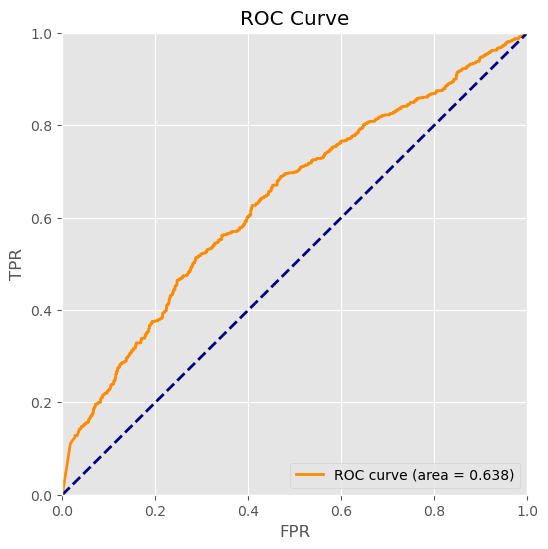

In [48]:
#在测试集上画roc
ROC_loader=DataLoader(dataset=test_dataset, batch_size=1)  #对每个测试集整体画ROC曲线
ROC_test(ROC_loader,model)
pred_label_file(ROC_loader,model,"1_K_corss")

In [28]:
#保存模型
torch.save(model.state_dict(),"WGCNA_CNN_model_2_74.6.pth")
print("保存模型状态到model_2_74.6.pth")

保存模型状态到model_2_74.6.pth


In [66]:
#保存模型
torch.save(model.state_dict(),"WGCNA_CNN_model.pth")
print("保存模型状态到model.pth")

保存模型状态到model.pth
